### Observations
1. When viewing how effective each drug was at reducing tumor size, it is clear that Capomulin is the most effective. Over the course of 45 days, Capomulin was found to reduce tumor volumes in the study by 19%. 
2. Not only did Capomulin prove effective at limiting tumor growth, but metastatic sites were also the lowest with Capomulin treatment, as compared to the other drugs in the study. The placebo subjects saw the highest average count of metastatic sites over the duration of the study.
3. 45 days of treatment observation were desired in the study, however some mice receiving their various treatments died prior to the end of the study. Infubinol saw the highest mortality rate, with less than 40% of mice surviving the full 45 days. 

In [266]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pprint import pprint


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_csv = "./mouse_drug_data.csv"
clinical_csv = "./clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_csv)
clinical_df = pd.read_csv(clinical_csv)

# Combine the data into a single dataset
combine_df = pd.merge(mouse_df, clinical_df, how='left', on='Mouse ID')

# Display the data table for preview
combine_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
group = combine_df.groupby(['Drug', 'Timepoint'], as_index=False)
mean_tumor_volume = group['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
mean_tumor_volume = pd.DataFrame(mean_tumor_volume)

# Preview DataFrame
mean_tumor_volume.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
sample_df = combine_df[['Drug', 'Timepoint', 'Tumor Volume (mm3)']].sort_values(['Drug', 'Timepoint']).reset_index(drop=True)
sample_group = sample_df.groupby(['Drug', 'Timepoint'])
standard_error = sample_group['Tumor Volume (mm3)'].sem()
standard_error_df = pd.DataFrame(standard_error).reset_index()

standard_error_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
new_columns = sorted([item for item in mean_tumor_volume['Drug'].value_counts().index])

drug_data = {}

for drug in new_columns:
    drug_data[drug] = mean_tumor_volume.loc[mean_tumor_volume['Drug'] == drug]['Tumor Volume (mm3)'].values

reformatted_drug_df = pd.DataFrame(drug_data, columns=new_columns)

timepoint_index = sorted(list(set(mean_tumor_volume['Timepoint'].values)))
reformatted_drug_df['Timepoint'] = pd.Series(timepoint_index)
reformatted_drug_df = reformatted_drug_df.set_index('Timepoint', drop=True)

# Preview that Reformatting worked
reformatted_drug_df.head()

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


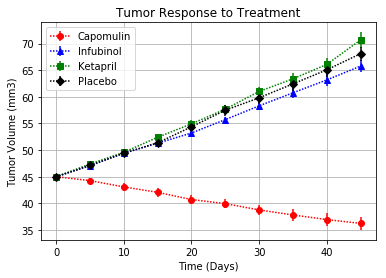

In [5]:
# Generate the Plot (with Error Bars)
x_axis = np.array(reformatted_drug_df.index)
x_tick_locations = [value for value in x_axis]

capomulin = plt.errorbar(x_axis, reformatted_drug_df['Capomulin'], standard_error_df.loc[standard_error_df['Drug'] == 'Capomulin']['Tumor Volume (mm3)'], linestyle='--', dashes=(1,1), marker='o', color='r')
infubinol = plt.errorbar(x_axis, reformatted_drug_df['Infubinol'], standard_error_df.loc[standard_error_df['Drug'] == 'Infubinol']['Tumor Volume (mm3)'], linestyle='--', dashes=(1,1), marker='^', color='b')
ketapril = plt.errorbar(x_axis, reformatted_drug_df['Ketapril'], standard_error_df.loc[standard_error_df['Drug'] == 'Ketapril']['Tumor Volume (mm3)'], linestyle='--', dashes=(1,1), marker='s', color='g')
placebo = plt.errorbar(x_axis, reformatted_drug_df['Placebo'], standard_error_df.loc[standard_error_df['Drug'] == 'Placebo']['Tumor Volume (mm3)'], linestyle='--', dashes=(1,1), marker='D', color='black')

plt.grid()
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend()

# Save the Figure
plt.savefig("TumorResponseToTreatment.png")

plt.show()


## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_group = combine_df.groupby(['Drug', 'Timepoint'])
mean_met_site = met_group['Metastatic Sites'].mean()

# Convert to DataFrame
mean_met_site_df = pd.DataFrame(mean_met_site)

# Preview DataFrame
mean_met_site_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_site_st_error = met_group['Metastatic Sites'].sem()

# Convert to DataFrame
met_st_error = pd.DataFrame(met_site_st_error)

# Preview DataFrame
met_st_error.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [267]:
# Minor Data Munging to Re-Format the Data Frames
meta_regroup = combine_df.groupby(['Drug', 'Timepoint'])
meta_mean_regroup = meta_regroup['Metastatic Sites'].mean()
meta_mean_regroup = pd.DataFrame(meta_mean_regroup)
meta_mean_regroup = meta_mean_regroup.reset_index(level='Drug')
drugs = sorted(meta_mean_regroup['Drug'].value_counts().index)
meta_mean_regroup['Metastatic Sites'].values

for drug in drugs:
    meta_mean_regroup[drug] = meta_mean_regroup.loc[meta_mean_regroup['Drug'] == drug, 'Metastatic Sites']

del meta_mean_regroup['Drug']
del meta_mean_regroup['Metastatic Sites']
meta_mean_regroup = meta_mean_regroup.iloc[0:10,:]

# Preview that Reformatting worked
meta_mean_regroup.head()

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


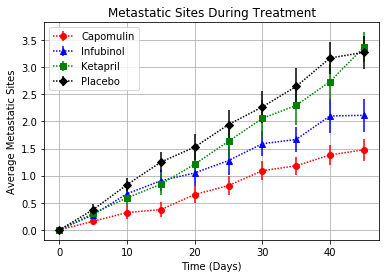

In [9]:
# Generate the Plot (with Error Bars)
x_axis = np.array(meta_mean_regroup.index)
x_tick_locations = [value for value in x_axis]

capomulin_meta = plt.errorbar(x_axis, meta_mean_regroup['Capomulin'], met_st_error.loc['Capomulin','Metastatic Sites'], linestyle='--', dashes=(1,1), marker='o', color='r')
infubinol_meta = plt.errorbar(x_axis, meta_mean_regroup['Infubinol'], met_st_error.loc['Infubinol','Metastatic Sites'], linestyle='--', dashes=(1,1), marker='^', color='b')
ketapril_meta = plt.errorbar(x_axis, meta_mean_regroup['Ketapril'], met_st_error.loc['Ketapril', 'Metastatic Sites'], linestyle='--', dashes=(1,1), marker='s', color='g')
placebo_meta = plt.errorbar(x_axis, meta_mean_regroup['Placebo'], met_st_error.loc['Placebo', 'Metastatic Sites'], linestyle='--', dashes=(1,1), marker='D', color='black')

plt.grid()
plt.title('Metastatic Sites During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Average Metastatic Sites')
plt.legend()

# Save the Figure
plt.savefig('Metastatic_Sites_During_Treatment.png')

# Show the Figure
plt.show()

## Survival Rates

In [269]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = combine_df.groupby(['Drug', 'Timepoint'])
mice_count_per_drug_per_time = mice_count.nunique('Mouse ID')

# Convert to DataFrame
mice_count_df = mice_count_per_drug_per_time[['Mouse ID']]
mice_count_df = mice_count_df.rename(columns={'Mouse ID':'Remaining Mice'})

# Preview DataFrame
mice_count_df.head()

Remaining Mice
Drug      Timepoint                
Capomulin 0                      25
          5                      25
          10                     25
          15                     24
          20                     23

In [270]:
# Minor Data Munging to Re-Format the Data Frames
mice_count_df = mice_count_df.reset_index(level='Drug')

for drug in sorted(mice_count_df['Drug'].value_counts().index):
    mice_count_df[drug] = mice_count_df.loc[mice_count_df['Drug'] == drug, 'Remaining Mice']

del mice_count_df['Drug']
del mice_count_df['Remaining Mice']
mice_count_df = mice_count_df.iloc[0:len(set(mice_count_df.index)), :]

# Preview the Data Frame
mice_count_df.head()

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


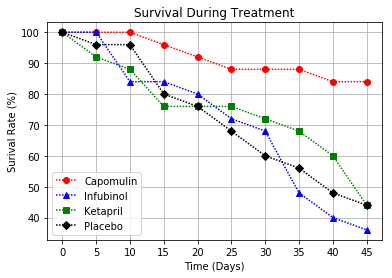

In [12]:
# Survival Percentage
mice_alive = {}
living_list = []

for column in range(len(mice_count_df.columns)):
    for row in range(len(mice_count_df)):
        living_list.append((100 * (mice_count_df.iloc[row, column] / max(mice_count_df.iloc[:,column]))))
    mice_alive[mice_count_df.columns[column]] = living_list[:]
    living_list.clear()

mice_alive['Timepoint'] = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
mice_survival_perc = pd.DataFrame(mice_alive)
mice_survival_perc = mice_survival_perc.set_index('Timepoint')

# Generate the Plot (Accounting for percentages)
x_axis = np.array(mice_survival_perc.index)
x_tick_locations = [value for value in x_axis]

capomulin_survival = plt.plot(x_axis, mice_survival_perc['Capomulin'], linestyle='--', dashes=(1,1), marker='o', color='r')
infubinol_survival = plt.plot(x_axis, mice_survival_perc['Infubinol'], linestyle='--', dashes=(1,1), marker='^', color='b')
ketapril_survival = plt.plot(x_axis, mice_survival_perc['Ketapril'], linestyle='--', dashes=(1,1), marker='s', color='g')
placebo_survival = plt.plot(x_axis, mice_survival_perc['Placebo'], linestyle='--', dashes=(1,1), marker='D', color='black')

plt.grid()
plt.title('Survival During Treatment')
plt.xticks(x_tick_locations)
plt.xlabel('Time (Days)')
plt.ylabel('Surival Rate (%)')
plt.legend()

# Save the Figure
plt.savefig('Survival_During_Treatment.png')

# Show the Figure
plt.show()

## Summary Bar Graph

In [13]:
# Average tumor size change per drug
sorted_df = combine_df.sort_values(by=['Drug', 'Mouse ID', 'Timepoint'])
sorted_df = sorted_df[sorted_df['Mouse ID'] != 'g989'] # Dropping mouse ID g989
sorted_df = sorted_df.reset_index(drop=True)

drug_list = sorted(combine_df['Drug'].value_counts().index)
drug_dict = {drug:[] for drug in drug_list}

# Iterate through each row, checking if next row timepoint == 0. 
#    If so, subtract current row tumor size from 45 and append to dict key for drug iterable
#    If index == len(df), subtract current row tumor size from 45 and append to dict key for drug iterable

for index in range(len(sorted_df)):
    try:
        if sorted_df.iloc[index, 0] != sorted_df.iloc[index + 1, 0]: # If next mouse is different
            difference = sorted_df.iloc[index, 3] - 45
            percent_change = (difference / 45) * 100
            drug_dict[sorted_df.iloc[index, 1]].append(percent_change)
            #print(f'The current index is {index}. The current drug is {sorted_df.iloc[index,1]}. The tumor diff is {sorted_df.iloc[index, 3] - 45}.')
    except IndexError:
            difference = sorted_df.iloc[index, 3] - 45
            percent_change = (difference / 45) * 100
            drug_dict[sorted_df.iloc[index, 1]].append(percent_change)

        
avg_drug_dict = {k:round((sum(v)/len(v))) for k,v in drug_dict.items()}
pprint(avg_drug_dict)

{'Capomulin': -19.0,
 'Ceftamin': 28.0,
 'Infubinol': 30.0,
 'Ketapril': 40.0,
 'Naftisol': 36.0,
 'Placebo': 34.0,
 'Propriva': 26.0,
 'Ramicane': -20.0,
 'Stelasyn': 36.0,
 'Zoniferol': 32.0}


In [271]:
# Sum tumor volume per drug at each timepoint, find percent change for day 45 vs day 0 ? 
sorted_df = combine_df.sort_values(by=['Drug', 'Mouse ID', 'Timepoint'])
sorted_df = sorted_df[sorted_df['Mouse ID'] != 'g989'] # Dropping mouse ID g989
sorted_df = sorted_df.reset_index(drop=True)

time_group = sorted_df.groupby(['Drug', 'Timepoint'])
total_tumor_per_time_by_drug = time_group['Tumor Volume (mm3)'].sum()

total_tumor_per_time_by_drug = pd.DataFrame(total_tumor_per_time_by_drug)
total_tumor_per_time_by_drug = total_tumor_per_time_by_drug.reset_index(level='Drug')

for drug in sorted(total_tumor_per_time_by_drug['Drug'].value_counts().index):
    total_tumor_per_time_by_drug[drug] = total_tumor_per_time_by_drug.loc[total_tumor_per_time_by_drug['Drug'] == drug, ['Tumor Volume (mm3)']]
del total_tumor_per_time_by_drug['Drug']
del total_tumor_per_time_by_drug['Tumor Volume (mm3)']

total_tumor_per_time_by_drug = total_tumor_per_time_by_drug.iloc[0:10, :]

drug_list = sorted(combine_df['Drug'].value_counts().index)
drug_dict = {drug:[] for drug in drug_list}

for drug in drug_list:
    drug_dict[drug].append( total_tumor_per_time_by_drug[drug].values / mice_count_df[drug].values) 
    
for key in drug_dict.keys():
    drug_dict[key] = [( drug_dict[key][0][-1] - drug_dict[key][0][0] ) / drug_dict[key][0][0] * 100]

tumor_percent_change_per_drug = pd.DataFrame(drug_dict)
tumor_percent_change_per_drug.head()

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,-19.475303,42.516492,46.123472,57.028795,53.923347,51.29796,53.376224,-22.3209,58.422015,46.579751


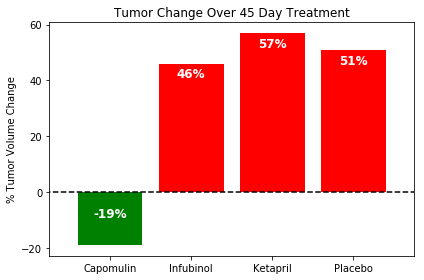

In [265]:
tumor_change = {'change':[int(tumor_percent_change_per_drug['Capomulin'].values[0]),
                        int(tumor_percent_change_per_drug['Infubinol'].values[0]),
                        int(tumor_percent_change_per_drug['Ketapril'].values[0]),
                        int(tumor_percent_change_per_drug['Placebo'].values[0])]}
relevant_changes = pd.DataFrame(tumor_change)

passing = relevant_changes[relevant_changes['change'] < 0]
failing = relevant_changes[relevant_changes['change'] > 0]


plt.xticks(x_axis, ('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
plt.title('Tumor Change Over 45 Day Treatment')
plt.ylabel('% Tumor Volume Change')
plt.yticks(np.arange(-20, 61, 20))
plt.hlines(0,-1,5, linestyles='dashed')
plt.xlim(-0.75, len(x_axis)-0.25)
plt.bar(passing.index.values, passing['change'], color='green', align='center')
plt.bar(failing.index.values, failing['change'], color='red', align='center')
plt.tight_layout()

font = {'family': 'sanserif',
        'color':  'white',
        'weight': 'bold',
        'size': 12,
        }

for index,data in enumerate(passing['change']):
    plt.text(x = index, y = data+10, s = f'{data}%', horizontalalignment='center', fontdict=font)
for index,data in enumerate(failing['change']):
    plt.text(x = index + 1, y = data-5, s = f'{data}%', horizontalalignment='center', fontdict=font)

plt.tight_layout()

plt.savefig('Tumor_Change_45_Day_Treatment.png')

plt.show()